In [2]:
    """
    MNIST
    DataLoaer, Transformation
    Multilayer Neural Net, activation function
    loss and optimizer
    training loop(batch training)
    model evaluation
    GPU SUPPORT
    """

'\nMNIST\nDataLoaer, Transformation\nMultilayer Neural Net, activation function\nloss and optimizer\ntraining loop(batch training)\nmodel evaluation\nGPU SUPPORT\n'

In [3]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [4]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
input_size = 784#28*28
hidden_size =100
num_classes =10# number is from 0 to 9
num_epochs = 2
batch_size=100
learning_rate = 0.001

In [15]:
# mnist
train_dataset = torchvision.datasets.MNIST(root = './',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root = './',train=False,transform=transforms.ToTensor())

In [7]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [8]:
examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape,labels.shape)
# batch size is 100, 1- because we have single colour channel

torch.Size([100, 1, 28, 28]) torch.Size([100])


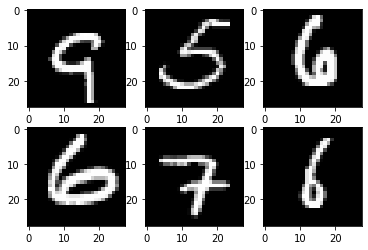

In [9]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [10]:
# now we need to make our classifier model
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.tanh = nn.Tanh()
        self.l2 = nn.Linear(hidden_size,hidden_size//2)
        self.l3=nn.Linear(hidden_size//2,num_classes)

    def forward(self,x):
        out=self.l1(x)
        out=self.tanh(out)
        out=self.l2(out)
        out=self.tanh(out)
        out=self.l3(out)
        return out

In [11]:
model = NeuralNet(input_size,hidden_size,num_classes)

In [12]:
# loss and optimizer
criterion = nn.CrossEntropyLoss() # this will create the softmax for us 
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [13]:
# training loop 
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        # we need to reshape our images
        # 100,1,28,28 to  100,784
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) %100==0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1 / 2, step 100/600, loss = 0.4793
epoch 1 / 2, step 200/600, loss = 0.3330
epoch 1 / 2, step 300/600, loss = 0.2661
epoch 1 / 2, step 400/600, loss = 0.1326
epoch 1 / 2, step 500/600, loss = 0.1205
epoch 1 / 2, step 600/600, loss = 0.2312
epoch 2 / 2, step 100/600, loss = 0.1811
epoch 2 / 2, step 200/600, loss = 0.2370
epoch 2 / 2, step 300/600, loss = 0.1122
epoch 2 / 2, step 400/600, loss = 0.1379
epoch 2 / 2, step 500/600, loss = 0.1786
epoch 2 / 2, step 600/600, loss = 0.1312


In [14]:
# test
with torch.no_grad():
    n_correct=0
    n_samples = 0
    for images,labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # value, index
        _,predictions = torch.max(outputs,1)
        n_samples+=labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    

    acc =100 *n_correct/n_samples# calculate accuracy
    print(f'accuracy: {acc}')

accuracy: 95.81
